###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [82]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [4]:
df1 = pd.read_csv('/content/college_1.csv')
df2 = pd.read_csv('/content/college_2.csv')
df2.drop(['python_en','computational_thinking'],axis = 1, inplace=True)
df2 = df2.astype({'python':float})
df2 = df2.astype({'mysql':float})
df = df1.append(df2, ignore_index=True)



###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [ ]:
a = df[(df['CodeKata Score']>10000) & (df['CodeKata Score']<15000)]
a = a.reset_index()
del a['index']
a.to_csv('Reached_expectations.csv', index=False)

In [29]:
b = df[(df['CodeKata Score']>7000) & (df['CodeKata Score']<10000)]
b = b.reset_index()
del b['index']
b.to_csv('Needs_Improvement.csv', index=False)

In [34]:
c = df[(df['CodeKata Score']<7000)]
c = c.reset_index()
del c['index']
c.to_csv('Unsatisfactory.csv', index=False)

In [36]:
d = df[(df['CodeKata Score']>15000)]
d = d.reset_index()
del d['index']
d.to_csv('Exceeded expectations.csv', index=False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [50]:
print(df['CodeKata Score'].mean())
print(df['Previous Geekions'].mean())

4051.764705882353
3842.3529411764707


###### No of students participated 

In [93]:
ndf = df[df['Previous Geekions'] > 0]
ndf = ndf.reset_index()
del ndf['index']
ndf

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0
...,...,...,...,...,...,...,...
107,M.Karthikeyan,-1.0,4.0,4020,4020,Computer Science and Engineering,0
108,Abishak s,-1.0,35.0,3220,3220,Electronics and Communication Engineering,0
109,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0
110,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0


###### #Average completion of python course or my_sql or python english or computational thinking

In [58]:
print(df['python'].mean())
print(df['mysql'].mean())
df2 = pd.read_csv('/content/college_2.csv')
print(df2['python_en'].mean())
print(df2['computational_thinking'].mean())

54.35294117647059
23.5
29.65714285714286
2.2


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [64]:
s = df.sort_values('Rising', ascending=False)
s.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,average score
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,6750.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,5800.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,9790.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [66]:
gs = df.sort_values('CodeKata Score', ascending=False)
gs.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,average score
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,24500.0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,21740.0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,19680.0


###### Department wise codekata performence (pie chart)

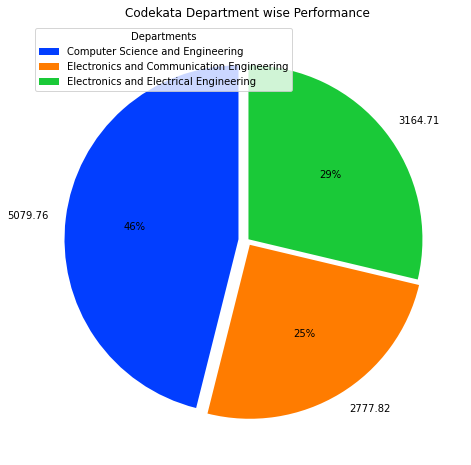

In [48]:
data = df.groupby('Department')['CodeKata Score'].mean()

lables = ['Computer Science and Engineering','Electronics and Communication Engineering', 'Electronics and Electrical Engineering ']

plt.figure(figsize = (15,8))
plt.title('Codekata Department wise Performance')
colors = sns.color_palette('bright')[0:5]
explode = [0.05,0.03,0.01]
plt.pie(data, colors = colors, labels = round(data,2) , autopct='%.0f%%',startangle = 90, explode = explode)
plt.legend(title = "Departments", loc='upper left', labels = lables)
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


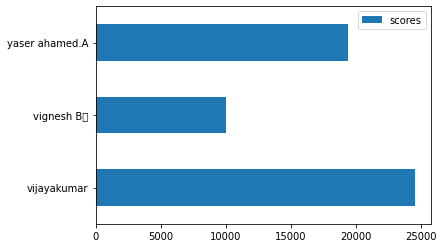

In [89]:
data = df.groupby('Department').max()
data

department=['Computer Science and Engineering','Electronics and Communication Engineering', 'Electronics and Electrical Engineering ']
names = ['vijayakumar','vignesh B	','yaser ahamed.A']
scores = [24500,10040,19400]

df = pd.DataFrame({'scores': scores,
                   'Department': department}, index=names)

ax = df.plot.barh()